In [1]:
from monk import workflow, utils
import signac
import glob
import gsd.hoomd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import freud
from schmeud import _schmeud

In [2]:
root = "/media/ian/Data2/monk/2d-osc-shear"
project: signac.Project = signac.get_project(root)

In [3]:
for job in project:
    sp = job.sp

    print(sp.prep)

    # for file in sorted(files):

    break

HTL


In [5]:
job.id

'634e14bc75836df75158fb15f379d8bb'

In [10]:
file = glob.glob(job.fn("experiments/max-shear-0.12/temp-0.0496/traj-fire_period-1000.0.gsd"))[0]

In [11]:
file

'/media/ian/Data2/monk/2d-osc-shear/workspace/634e14bc75836df75158fb15f379d8bb/experiments/max-shear-0.12/temp-0.0496/traj-fire_period-1000.0.gsd'

In [13]:
from matplotlib import collections as mc

/tmp/ipykernel_330073/3414289993.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_330073/3414289993.py:98: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


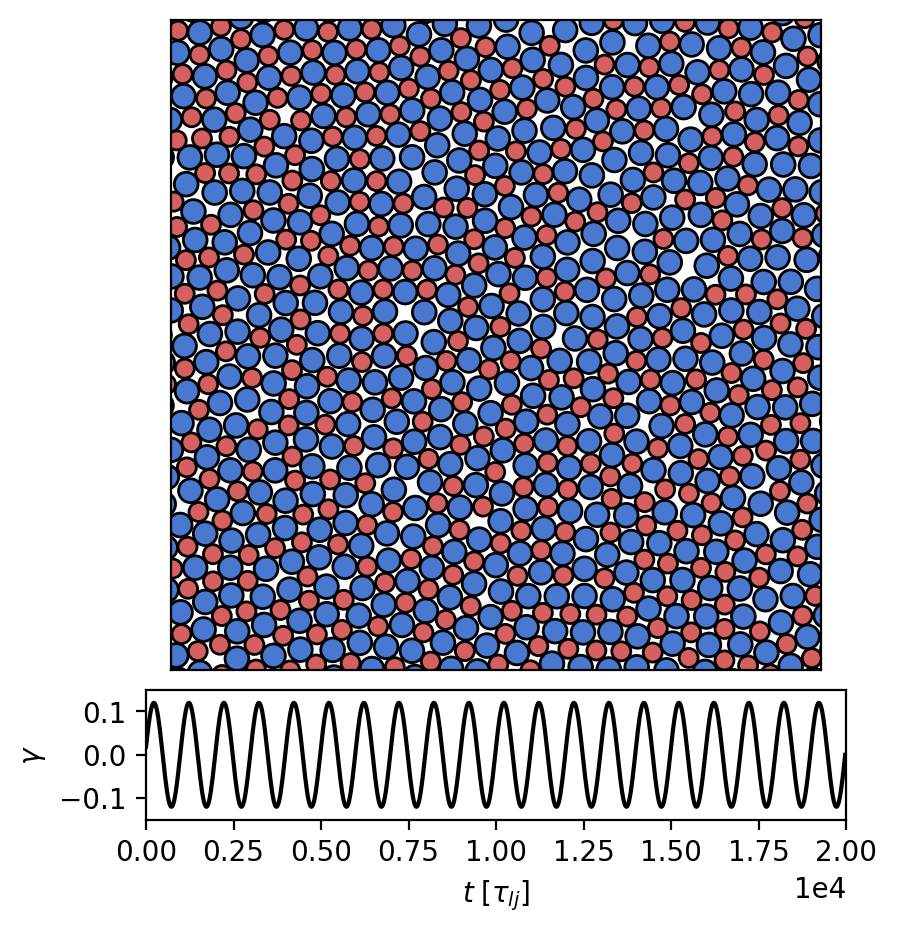

In [86]:
traj = gsd.hoomd.open(file, 'rb')
L = 15
l = L - 2

# fig, axs = plt.subplots(1, 2, figsize=(5, 5), dpi=200)
# ax = axs[0]
# Start with a square Figure.
fig = plt.figure(figsize=(5, 5), dpi=200)
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 1,  width_ratios=[1], height_ratios=(5, 1),
                      left=0.15, right=0.85, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax.set_aspect('equal')

shears = []

xs = np.linspace(0, 800/40*1000, len(traj), endpoint=False)

snap0 = traj[0]

ref_pos = snap0.particles.position



for i, snap in enumerate(traj):
    
    # if i > 10:
    #     break
    
    ax.clear()
    ax2.clear()

    box = snap.configuration.box
    freud_box = freud.box.Box.from_box(box)
    shears.append(snap.configuration.box[3])

    pos = snap.particles.position

    dx = freud_box.wrap(pos - ref_pos)

    pos = ref_pos + dx
    
    cond = (pos[:, 0] > -L) & (pos[:, 0] < L) & (pos[:, 1] > -L) & (pos[:, 1] < L)



    pos = pos[cond]
    ids = snap.particles.typeid[cond]

    patches = []

    for p, j in zip(pos, ids):
        if j == 0:
            D = 0.5*.95
            C = "#4878d0"
        else:
            D = 0.4*0.95
            C = "#d65f5f"

        patches.append(plt.Circle(p, D, facecolor=C, linewidth=1, edgecolor='k'))

    ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    labelleft=False) # labels along the bottom edge are off

    # plt.tick_params(
    # axis='y',          # changes apply to the x-axis
    # which='both',      # both major and minor ticks are affected
    # left=False,      # ticks along the bottom edge are off
    # right=False,         # ticks along the top edge are off
    # labelbottom=False) # labels along the bottom edge are off

    ax.add_collection(mc.PatchCollection(patches, match_original=True))

    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)

    ax2.set_ylabel(r"$\gamma$")
    ax2.set_xlabel(r"$t \; [\tau_{lj}]$")
    ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


    ax2.set_xlim(0, 800/40*1000)
    ax2.set_ylim(-0.15, 0.15)
    ax2.plot(xs[:len(shears)], shears, color='k')
    # print(i)
    fig.tight_layout()
    
    plt.savefig(f"images/test-{i:03d}.png", dpi=200)
    

    # break

In [38]:
len(traj)

800

In [87]:
import ffmpeg
import os
output_file = "shear-v2.mp4"
if os.path.exists(output_file):
    os.remove(output_file)
(
ffmpeg
    .input("images/test-*.png", pattern_type="glob", framerate=10)
    .output(output_file).run()
)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


frame=  800 fps=104 q=-1.0 Lsize=   32858kB time=00:01:19.70 bitrate=3377.3kbits/s speed=10.4x    
video:32848kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.031770%
[libx264 @ 0x5fca52673d80] frame I:4     Avg QP:13.64  size:191387
[libx264 @ 0x5fca52673d80] frame P:230   Avg QP:21.42  size: 75912
[libx264 @ 0x5fca52673d80] frame B:566   Avg QP:27.34  size: 27226
[libx264 @ 0x5fca52673d80] consecutive B-frames:  2.0%  7.5% 10.5% 80.0%
[libx264 @ 0x5fca52673d80] mb I  I16..4: 50.1%  0.0% 49.9%
[libx264 @ 0x5fca52673d80] mb P  I16..4:  0.9%  0.0%  2.3%  P16..4:  4.7% 12.2% 23.5%  0.0%  0.0%    skip:56.4%
[libx264 @ 0x5fca52673d80] mb B  I16..4:  0.1%  0.0%  0.2%  B16..8:  7.8% 14.1% 14.9%  direct: 4.7%  skip:58.1%  L0:40.1% L1:35.0% BI:24.9%
[libx264 @ 0x5fca52673d80] coded y,u,v intra: 53.9% 42.7% 42.6% inter: 22.4% 2.5% 2.4%
[libx264 @ 0x5fca52673d80] i16 v,h,dc,p: 78% 21%  2%  0%
[libx264 @ 0x5fca52673d80] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 24% 18% 12%  

(None, None)

In [88]:
import ffmpeg
import os
output_file = "shear-v3.mp4"
if os.path.exists(output_file):
    os.remove(output_file)
(
ffmpeg
    .input("images/test-*.png", pattern_type="glob", framerate=10)
    .output(output_file, video_bitrate="20M", pix_fmt="4:2:2")
    .run()
)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


frame=  800 fps= 72 q=-1.0 Lsize=  193231kB time=00:01:19.70 bitrate=19861.3kbits/s speed=7.13x    x    
video:193219kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.006171%
[libx264 @ 0x56fb31c7adc0] frame I:4     Avg QP: 0.73  size:599860
[libx264 @ 0x56fb31c7adc0] frame P:230   Avg QP: 4.28  size:345816
[libx264 @ 0x56fb31c7adc0] frame B:566   Avg QP: 8.62  size:204802
[libx264 @ 0x56fb31c7adc0] consecutive B-frames:  2.0%  7.5% 10.5% 80.0%
[libx264 @ 0x56fb31c7adc0] mb I  I16..4: 50.4%  0.0% 49.6%
[libx264 @ 0x56fb31c7adc0] mb P  I16..4:  0.3%  0.0%  2.4%  P16..4:  3.4%  8.4% 28.6%  0.0%  0.0%    skip:57.0%
[libx264 @ 0x56fb31c7adc0] mb B  I16..4:  0.0%  0.0%  0.3%  B16..8:  2.6%  5.7% 30.3%  direct: 3.7%  skip:57.5%  L0:38.4% L1:29.8% BI:31.8%
[libx264 @ 0x56fb31c7adc0] final ratefactor: 1.66
[libx264 @ 0x56fb31c7adc0] coded y,u,v intra: 65.8% 62.0% 62.0% inter: 35.7% 26.9% 27.1%
[libx264 @ 0x56fb31c7adc0] i16 v,h,dc,p: 84% 14%  2%  0%
[libx264 @ 0

(None, None)

/tmp/ipykernel_330073/3279507178.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_330073/3279507178.py:98: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


ValueError: x and y must have same first dimension, but have shapes (200,) and (201,)

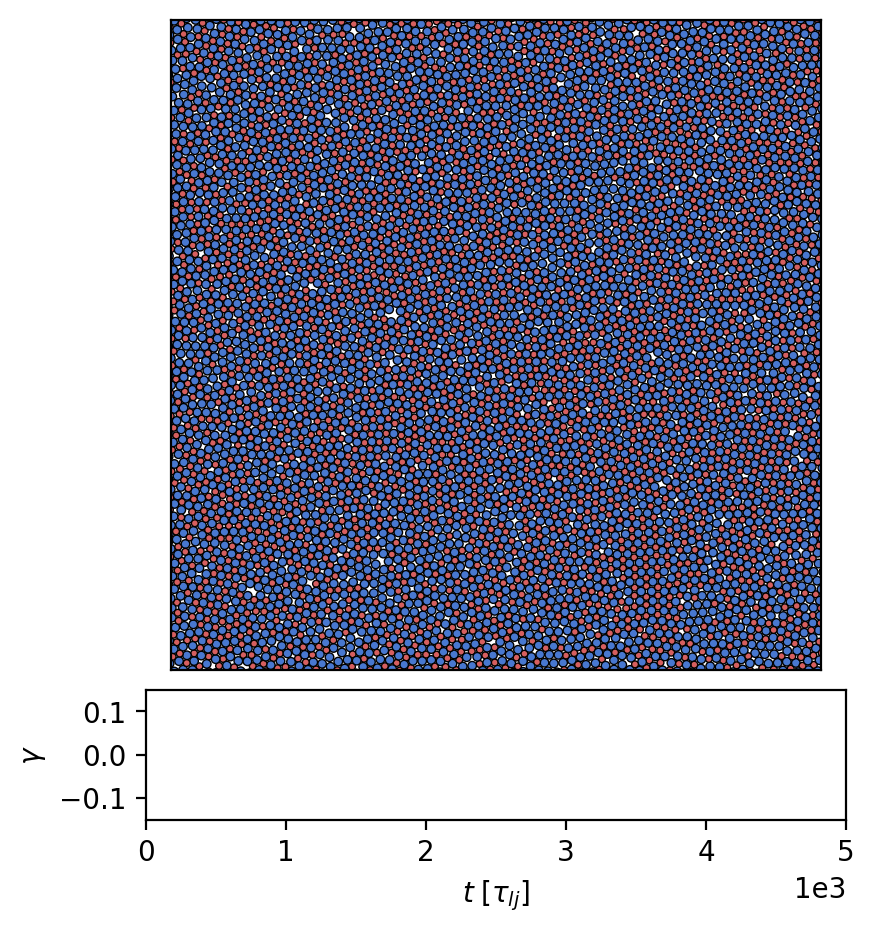

In [94]:
traj = gsd.hoomd.open(file, 'rb')
L = 40
l = L - 2

# fig, axs = plt.subplots(1, 2, figsize=(5, 5), dpi=200)
# ax = axs[0]
# Start with a square Figure.
fig = plt.figure(figsize=(5, 5), dpi=200)
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 1,  width_ratios=[1], height_ratios=(5, 1),
                      left=0.15, right=0.85, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax.set_aspect('equal')

shears = []

xs = np.linspace(0, 200/40*1000, 200, endpoint=False)

snap0 = traj[0]

ref_pos = snap0.particles.position



for i, snap in enumerate(traj):
    
    if i > 200:
        break
    
    ax.clear()
    ax2.clear()

    box = snap.configuration.box
    freud_box = freud.box.Box.from_box(box)
    shears.append(snap.configuration.box[3])

    pos = snap.particles.position

    dx = freud_box.wrap(pos - ref_pos)

    pos = ref_pos + dx
    
    cond = (pos[:, 0] > -L) & (pos[:, 0] < L) & (pos[:, 1] > -L) & (pos[:, 1] < L)



    pos = pos[cond]
    ids = snap.particles.typeid[cond]

    patches = []

    for p, j in zip(pos, ids):
        if j == 0:
            D = 0.5
            C = "#4878d0"
        else:
            D = 0.4
            C = "#d65f5f"

        patches.append(plt.Circle(p, D, facecolor=C, linewidth=.5, edgecolor='k'))

    ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    labelleft=False) # labels along the bottom edge are off

    # plt.tick_params(
    # axis='y',          # changes apply to the x-axis
    # which='both',      # both major and minor ticks are affected
    # left=False,      # ticks along the bottom edge are off
    # right=False,         # ticks along the top edge are off
    # labelbottom=False) # labels along the bottom edge are off

    ax.add_collection(mc.PatchCollection(patches, match_original=True))

    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)

    ax2.set_ylabel(r"$\gamma$")
    ax2.set_xlabel(r"$t \; [\tau_{lj}]$")
    ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


    ax2.set_xlim(0, 200/40*1000)
    ax2.set_ylim(-0.15, 0.15)
    ax2.plot(xs[:len(shears)], shears, color='k')
    # print(i)
    fig.tight_layout()
    
    plt.savefig(f"images/testv2-{i:03d}.png", dpi=200)
    

    # break

In [7]:
import ffmpeg
import os
output_file = "shear2-v3-h264.mp4"
if os.path.exists(output_file):
    os.remove(output_file)
(
ffmpeg
    .input("images/testv2-*.png", pattern_type="glob", framerate=10)
    .output(output_file, video_bitrate="20M", vcodec="h264").run()
)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


(None, None)